In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyabc

import os
import seaborn as sns


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
from matplotlib import rc
rc('font', **font)

In [2]:
psize=500
wsize=768
version=5
history_DLA=pyabc.History("sqlite:///" +
                          os.path.join("/home/felipe/testresults/Tumor",
                                       "TumorP"+str(psize)+"W"+str(wsize)+"DYNLA"+str(version)+".db"))

history_ORI=pyabc.History("sqlite:///" +
                          os.path.join("/home/felipe/testresults/Tumor",
                                       "TumorP"+str(psize)+"W"+str(wsize)+"ORI"+str(version)+".db"))

path = "/home/felipe/GitBackUps/Testresults/TumorModel/"+str(psize)+"_"+str(wsize)+"/Run"+str(version)
history_DLA.get_all_populations().to_csv(path+"/Tumor"+str(psize)+"AllPopLA.csv")
history_ORI.get_all_populations().to_csv(path+"/Tumor"+str(psize)+"AllPopOri.csv")

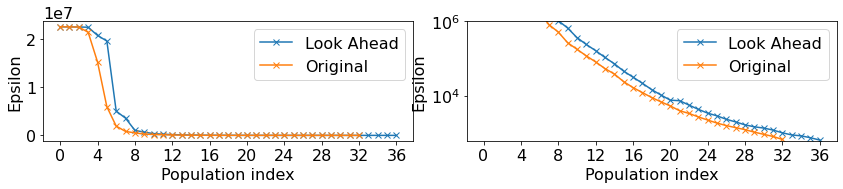

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax[0])
ax[0].set_title(None)


pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax[1])
ax[1].set_yscale("log")
ax[1].set_ylim(ymin=600,ymax=1000000)
ax[1].set_title(None)
#pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["DYNLA", "ORI"], ax=ax[2])
#ax[2].set_yscale("log")
#ax[2].set_ylim(ymin=600,ymax=10000)

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"Epsilons"+str(version)+".pdf")

/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

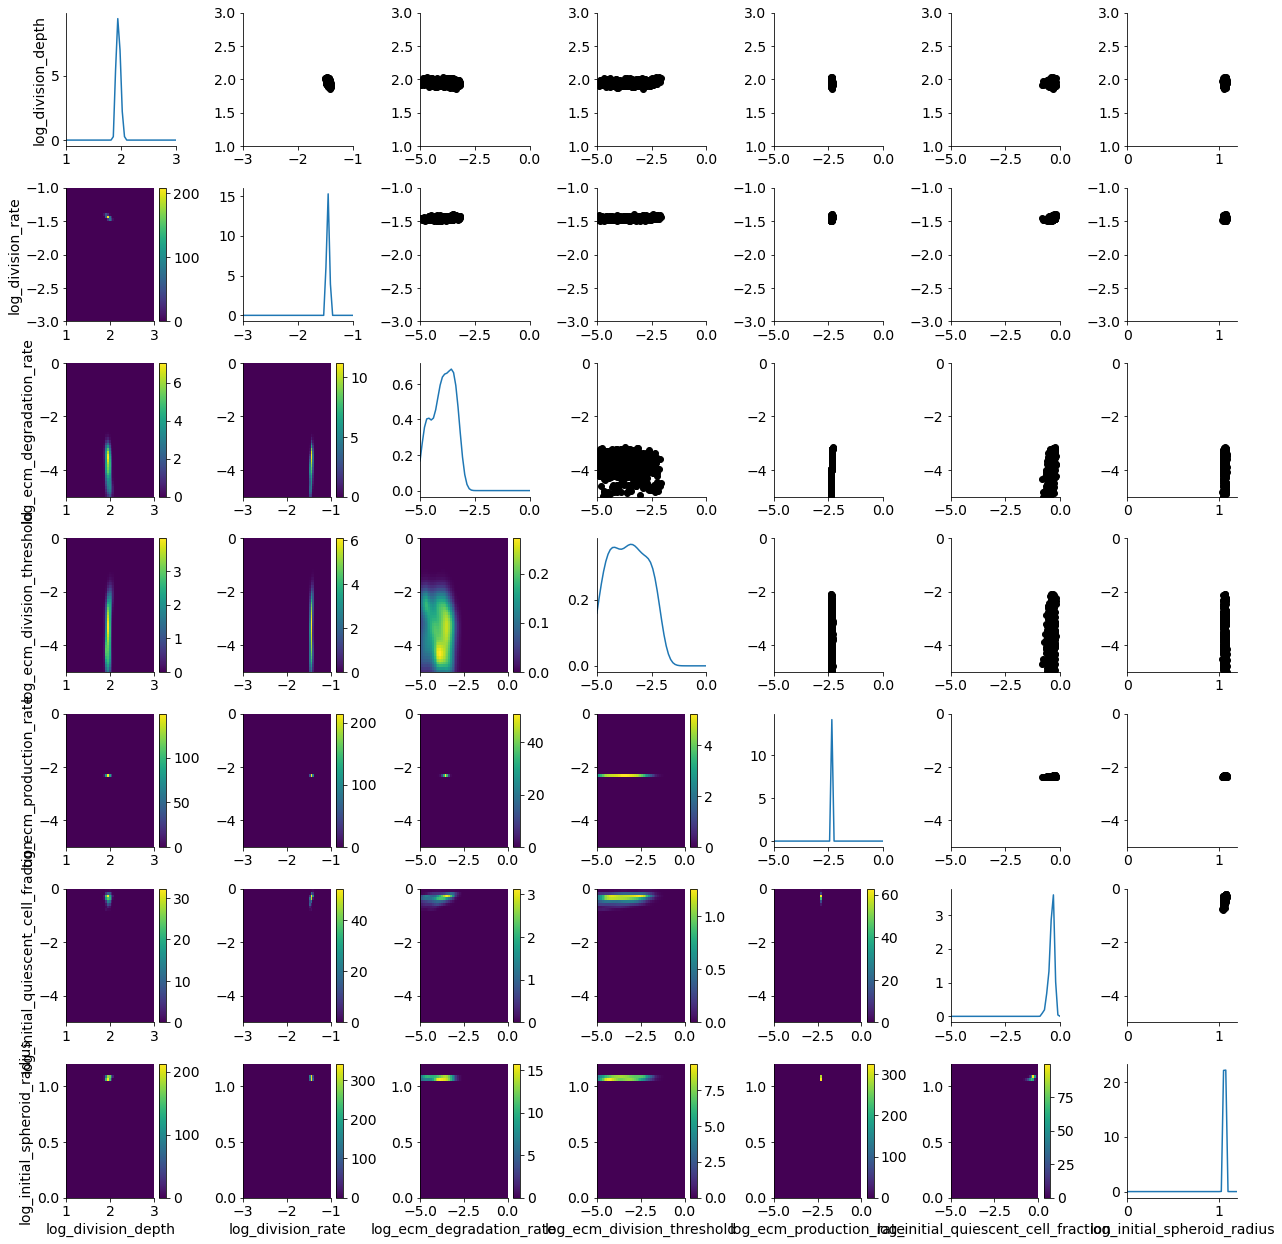

In [27]:
limits = dict(log_division_rate=(-3, -1),
              log_division_depth=(1, 3),
              log_initial_spheroid_radius=(0, 1.2),
              log_initial_quiescent_cell_fraction=(-5, 0),
              log_ecm_production_rate=(-5, 0),
              log_ecm_degradation_rate=(-5, 0),
              log_ecm_division_threshold=(-5, 0))


df, w = history_DLA.get_distribution(m=0, t=history_DLA.max_t)
pyabc.visualization.plot_kde_matrix(df, w, limits=limits);


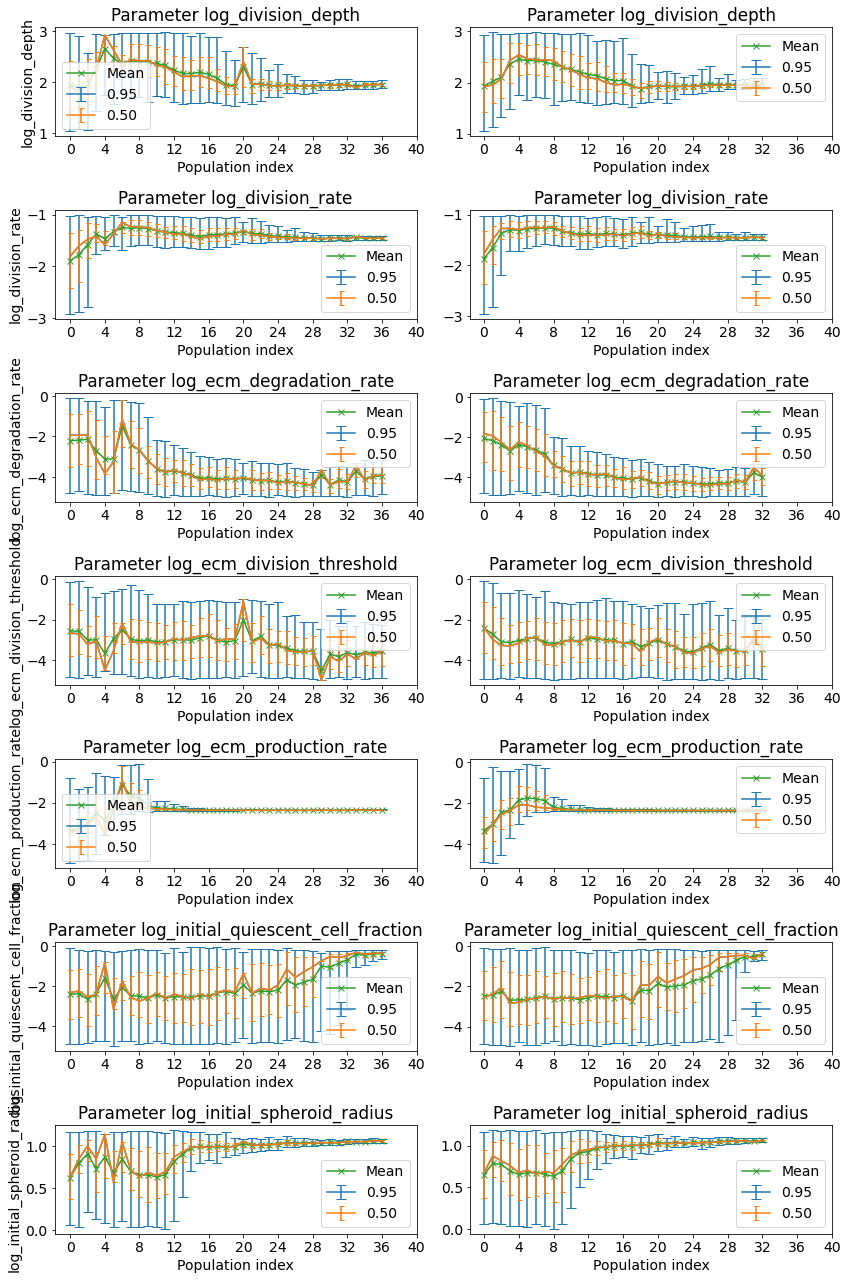

In [18]:
parameter_names=["log_division_depth",
                "log_division_rate",
                "log_ecm_degradation_rate",
                "log_ecm_division_threshold",
                "log_ecm_production_rate",
                "log_initial_quiescent_cell_fraction",
                "log_initial_spheroid_radius"]

fig = plt.figure(figsize=(12,18))

xticks = [0]
i=0
while i < len(history_DLA.get_all_populations()):
    i=i+4
    xticks.append(i)

for i in range(0,len(parameter_names)):
    ax = fig.add_subplot(len(parameter_names),2, 2*i+1)
    
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")

    
    ax = fig.add_subplot(len(parameter_names),2, 2*i + 2)
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")
    ax.set_ylabel(None)

    
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"CredibleIntervals"+str(version)+".pdf")

37


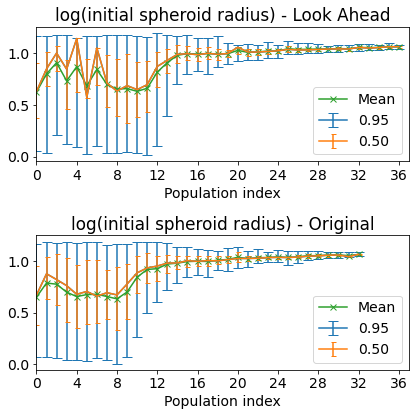

In [19]:
fig, axes = plt.subplots(2,1, figsize=(6, 6))

xticks = [0]
i=0
max_gen=max(len(history_DLA.get_all_populations()), len(history_ORI.get_all_populations()))-1
print(max_gen)

while i < max_gen-1:
    i=i+4
    xticks.append(i)

for i in [6]:
    ax = axes[0]
    
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_title("log(initial spheroid radius) - Look Ahead")
    ax.set_xlim(xmin=0,xmax=max_gen)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_ylabel(None)
    ax.set_xlabel("Population index")
    
    ax = axes[1]
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    ax.set_xlabel("Population index")

    
    ax.set_title("log(initial spheroid radius) - Original")
    ax.set_xlim(xmin=0,xmax=max_gen)
    ax.set_xticks(xticks)
    ax.set_ylabel(None)
    ax.set_xticklabels(xticks)
    
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"CI1Par"+str(version)+".pdf")

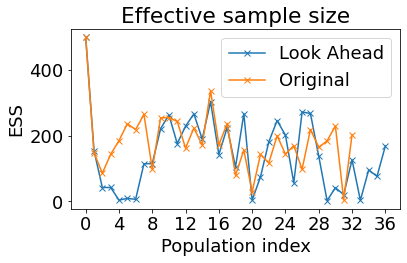

In [21]:
fig, ax = plt.subplots(1,1)

pyabc.visualization.plot_effective_sample_sizes([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax)

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EffSampleSize"+str(version)+".pdf")

In [3]:
DLADF = history_DLA.get_all_populations()
starttime = DLADF["population_end_time"][0]

new_col=[]
for i in range(0,len(DLADF)):
    new_col.append((DLADF["population_end_time"][i]-DLADF["population_end_time"][0]).total_seconds())
DLADF.insert(2, "time_passed_s", new_col, True)


ORIDF = history_ORI.get_all_populations()
starttime = ORIDF["population_end_time"][0]

new_col=[]
for i in range(0,len(ORIDF)):
    new_col.append((ORIDF["population_end_time"][i]-ORIDF["population_end_time"][0]).total_seconds())
ORIDF.insert(2, "time_passed_s", new_col, True)


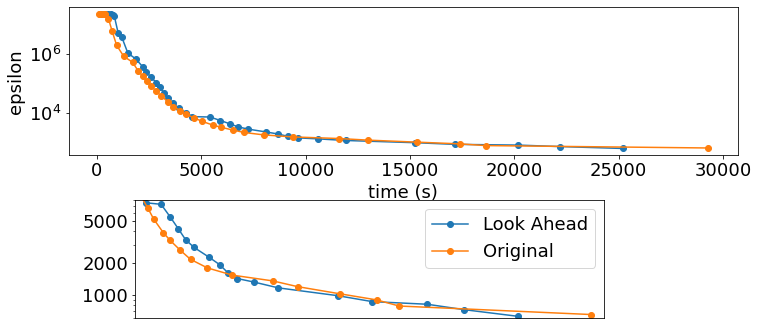

In [4]:
fig, axes = plt.subplots(2,1, figsize=(12,6))

ax = axes[0]

ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")
ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")

ax.set_yscale("log")
ax.set_ylabel("epsilon")
ax.set_xlabel("time (s)")

ax = axes[1]

ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")
ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")

ax.set_yscale("log")

from matplotlib.ticker import NullFormatter
ax.yaxis.set_minor_formatter(NullFormatter())

ax.set_ylim(ymin=600, ymax=8000)
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
ax.set_ylabel(None)
ax.set_yticks([1000,2000,5000])
ax.set_yticklabels([1000,2000,5000])
ax.set_xlim(xmin=4000, xmax=30000)
ax.set_xlabel(None)
ax.set_xticks([])

box = ax.get_position()
ax.set_position([box.x0+0.1*box.width, box.y0+0.1*box.height, 0.7*box.width, 0.8*box.height])

ax.legend()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EpsilonOverTime"+str(version)+".jpg")

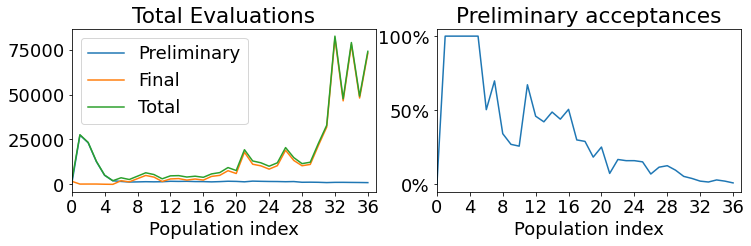

In [16]:
stat_df = pd.read_csv(path+"/TumorStats"+str(psize)+".csv")[1:]

fig, axes = plt.subplots(1,2, figsize=(12,3))


ax = axes[0]

ax.plot(stat_df['t'],stat_df['n_lookahead'], label="Preliminary")
ax.plot(stat_df['t'],stat_df['n_evaluated']-stat_df['n_lookahead'], label="Final")
ax.plot(stat_df['t'],stat_df['n_evaluated'], label="Total")

ax.title.set_text("Total Evaluations")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.legend()


ax = axes[1]

n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/500
    
ax.plot(stat_df['t'], n_lookahead_particles)

ax.title.set_text("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)


from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
"""
ax = axes[2]

n_total_acceptances=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_total_acceptances[i]=max(stat_df['n_accepted'][i+1], stat_df['n_lookahead_accepted'][i+1])

ax.plot(stat_df['t'], stat_df['n_lookahead_accepted']/stat_df['n_lookahead'], label='look_ahead')
ax.plot(stat_df['t'], n_total_acceptances/stat_df['n_evaluated'], label='total')


ax.title.set_text("Acceptance rates")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.legend()
"""


fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"Acceptances"+str(version)+".pdf")